In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\alimi\\My Python Stuff\\Machine Leaning & Data Science\\Course Notebook\\DATA\\penguins_size.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Handling Missing Values

missing values are handled by either dropping the rows or predicting the missing features by using SVM (support vector machine)

In [7]:
'''
    function for viewing the missing values percentage on the dataset
'''

def missing_percentage(df):
    missing = df.isnull().sum()*100/len(df)
    print (missing[missing>0].sort_values())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
missing_percentage(df)

culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64


In [10]:
df[(df['culmen_length_mm'].isnull()) & (df['flipper_length_mm'].isnull()) & (df['culmen_depth_mm'].isnull()) & (df['body_mass_g'].isnull())]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


### Dropping rows with missing values on every attributes 

there is a couple of rows that are dropped because every feature on those rows is missing so there's nothing that can be done towards them

In [11]:
idx = [3, 339]
df.drop(idx, inplace=True)

In [12]:
df[(df['culmen_length_mm'].isnull()) & (df['flipper_length_mm'].isnull()) & (df['culmen_depth_mm'].isnull()) & (df['body_mass_g'].isnull())]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


### Predicting missing values with SVM

predicting missing 'sex' features through the use of support vector machines algorithm

In [14]:
X_train = df[df['sex'].notnull()]
X_test = df[df.isnull().any(axis=1)]

In [15]:
X_train

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [16]:
X_test

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [17]:
Y_train = X_train['sex']

In [18]:
Y_train

0        MALE
1      FEMALE
2      FEMALE
4      FEMALE
5        MALE
        ...  
338    FEMALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 334, dtype: object

In [19]:
X_train.drop('sex', axis=1, inplace=True)

C:\Users\alimi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
X_train

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


In [21]:
X_test.drop('sex', axis=1, inplace=True)

C:\Users\alimi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
X_test

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0
47,Adelie,Dream,37.5,18.9,179.0,2975.0
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0


### using one hot encoding to convert categorical features into numerical feature

training and testing data is combined in order to convert every single categories in dataset

In [23]:
#concat train and test data to do one hot encoding
X_test['train'] = 0
X_train['train'] = 1
combined_data = pd.concat([X_test, X_train])

<ipython-input-23-54f230fe978c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['train'] = 0
<ipython-input-23-54f230fe978c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['train'] = 1


In [24]:
combined_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,train
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,0
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,0
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,0
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,0
47,Adelie,Dream,37.5,18.9,179.0,2975.0,0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [25]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 8 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   train              342 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 21.4+ KB


In [26]:
combined_data_categorical = combined_data.select_dtypes(include='object')
combined_data_numerical = combined_data.select_dtypes(exclude='object')
species_label = combined_data_categorical['species']

In [27]:
combined_data_categorical_dummies = pd.get_dummies(combined_data_categorical, drop_first=True)

In [28]:
combined_data_categorical_dummies

,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
8,0,0,0,1
9,0,0,0,1
10,0,0,0,1
11,0,0,0,1
47,0,0,1,0
...,...,...,...,...
338,0,1,0,0
340,0,1,0,0
341,0,1,0,0
342,0,1,0,0


In [29]:
combined_data['species'].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [30]:
combined_data['island'].value_counts()

Biscoe       167
Dream        124
Torgersen     51
Name: island, dtype: int64

In [31]:
combined_data_numerical

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,train
8,34.1,18.1,193.0,3475.0,0
9,42.0,20.2,190.0,4250.0,0
10,37.8,17.1,186.0,3300.0,0
11,37.8,17.3,180.0,3700.0,0
47,37.5,18.9,179.0,2975.0,0
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1
340,46.8,14.3,215.0,4850.0,1
341,50.4,15.7,222.0,5750.0,1
342,45.2,14.8,212.0,5200.0,1


In [32]:
final_combined_data = pd.concat([combined_data_numerical, combined_data_categorical_dummies], axis=1)

In [33]:
final_combined_data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,train,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
8,34.1,18.1,193.0,3475.0,0,0,0,0,1
9,42.0,20.2,190.0,4250.0,0,0,0,0,1
10,37.8,17.1,186.0,3300.0,0,0,0,0,1
11,37.8,17.3,180.0,3700.0,0,0,0,0,1
47,37.5,18.9,179.0,2975.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,1,0,0
340,46.8,14.3,215.0,4850.0,1,0,1,0,0
341,50.4,15.7,222.0,5750.0,1,0,1,0,0
342,45.2,14.8,212.0,5200.0,1,0,1,0,0


In [34]:
# split test and train data
train_df = final_combined_data[final_combined_data['train']==1]
test_df = final_combined_data[final_combined_data['train']==0]

In [35]:
train_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,train,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,1,0,0
340,46.8,14.3,215.0,4850.0,1,0,1,0,0
341,50.4,15.7,222.0,5750.0,1,0,1,0,0
342,45.2,14.8,212.0,5200.0,1,0,1,0,0


In [36]:
test_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,train,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
8,34.1,18.1,193.0,3475.0,0,0,0,0,1
9,42.0,20.2,190.0,4250.0,0,0,0,0,1
10,37.8,17.1,186.0,3300.0,0,0,0,0,1
11,37.8,17.3,180.0,3700.0,0,0,0,0,1
47,37.5,18.9,179.0,2975.0,0,0,0,1,0
246,44.5,14.3,216.0,4100.0,0,0,1,0,0
286,46.2,14.4,214.0,4650.0,0,0,1,0,0
324,47.3,13.8,216.0,4725.0,0,0,1,0,0


In [37]:
train_df.drop('train', axis=1, inplace=True)
test_df.drop('train', axis=1, inplace=True)

C:\Users\alimi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Splitting training dataset into train and test data for the purpose of searching for the best hyperparameters through grid search cross validation

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# splitting training data for hyperparameter tuning with grid search CV
X_train_train, X_test_train, y_train_train, y_test_train = train_test_split(train_df, Y_train, test_size=0.3, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
# creating scaling object
scaler_obj = StandardScaler()
scaler_obj.fit(X_train_train)
X_train_train_scaled = scaler_obj.transform(X_train_train)
X_test_train_scaled = scaler_obj.transform(X_test_train)

In [41]:
from sklearn.svm import SVC

classifier_one = SVC(kernel='rbf', random_state=1)
classifier_one.fit(X_train_train_scaled, y_train_train)

SVC(random_state=1)

In [42]:
Y_pred_train = classifier_one.predict(X_test_train_scaled)

In [43]:
from sklearn.metrics import confusion_matrix
# creating confusion matrix object
cm = confusion_matrix(y_test_train, Y_pred_train)
accuracy=float(cm.diagonal().sum())/len(y_test_train)

In [44]:
accuracy

0.8910891089108911

In [45]:
from sklearn.model_selection import GridSearchCV

# defining parameter range for grid search
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
grid.fit(X_train_train_scaled, y_train_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\alimi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

The best parameters were 1000 for C, 0.001 for gamma, and rbf for the kernel types

In [46]:
# the best parameters for svm model
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [47]:
classifier_two = SVC(kernel='rbf', random_state=1, C=1000, gamma=0.001)
classifier_two.fit(X_train_train_scaled, y_train_train)

SVC(C=1000, gamma=0.001, random_state=1)

In [48]:
Y_pred_train = classifier_two.predict(X_test_train_scaled)

In [49]:
cm = confusion_matrix(y_test_train, Y_pred_train)
accuracy=float(cm.diagonal().sum())/len(y_test_train)

In [50]:
accuracy

0.900990099009901

In [51]:
scaler_obj_2 = StandardScaler()
scaler_obj_2.fit(train_df)
train_df_scaled = scaler_obj_2.transform(train_df)
test_df_scaled = scaler_obj_2.transform(test_df)

In [52]:
classifier_final = SVC(kernel='rbf', random_state=1, C=1000, gamma=0.001)
classifier_final.fit(train_df_scaled, Y_train)

SVC(C=1000, gamma=0.001, random_state=1)

In [53]:
Y_pred = classifier_final.predict(test_df_scaled)

In [54]:
Y_pred

array(['FEMALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE',
       'FEMALE'], dtype=object)

In [55]:
test_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
8,34.1,18.1,193.0,3475.0,0,0,0,1
9,42.0,20.2,190.0,4250.0,0,0,0,1
10,37.8,17.1,186.0,3300.0,0,0,0,1
11,37.8,17.3,180.0,3700.0,0,0,0,1
47,37.5,18.9,179.0,2975.0,0,0,1,0
246,44.5,14.3,216.0,4100.0,0,1,0,0
286,46.2,14.4,214.0,4650.0,0,1,0,0
324,47.3,13.8,216.0,4725.0,0,1,0,0


In [56]:
test_df['sex'] = Y_pred
test_df

<ipython-input-56-53c85dd40e3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['sex'] = Y_pred


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex
8,34.1,18.1,193.0,3475.0,0,0,0,1,FEMALE
9,42.0,20.2,190.0,4250.0,0,0,0,1,MALE
10,37.8,17.1,186.0,3300.0,0,0,0,1,FEMALE
11,37.8,17.3,180.0,3700.0,0,0,0,1,FEMALE
47,37.5,18.9,179.0,2975.0,0,0,1,0,FEMALE
246,44.5,14.3,216.0,4100.0,0,1,0,0,FEMALE
286,46.2,14.4,214.0,4650.0,0,1,0,0,FEMALE
324,47.3,13.8,216.0,4725.0,0,1,0,0,FEMALE


In [57]:
train_df['sex'] = Y_train

<ipython-input-57-9636b521c26f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['sex'] = Y_train


### Further data cleaning

In [58]:
train_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex
0,39.1,18.7,181.0,3750.0,0,0,0,1,MALE
1,39.5,17.4,186.0,3800.0,0,0,0,1,FEMALE
2,40.3,18.0,195.0,3250.0,0,0,0,1,FEMALE
4,36.7,19.3,193.0,3450.0,0,0,0,1,FEMALE
5,39.3,20.6,190.0,3650.0,0,0,0,1,MALE
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,1,0,0,FEMALE
340,46.8,14.3,215.0,4850.0,0,1,0,0,FEMALE
341,50.4,15.7,222.0,5750.0,0,1,0,0,MALE
342,45.2,14.8,212.0,5200.0,0,1,0,0,FEMALE


In [59]:
complete_df = pd.concat([train_df, test_df])

In [60]:
complete_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex
0,39.1,18.7,181.0,3750.0,0,0,0,1,MALE
1,39.5,17.4,186.0,3800.0,0,0,0,1,FEMALE
2,40.3,18.0,195.0,3250.0,0,0,0,1,FEMALE
4,36.7,19.3,193.0,3450.0,0,0,0,1,FEMALE
5,39.3,20.6,190.0,3650.0,0,0,0,1,MALE
...,...,...,...,...,...,...,...,...,...
11,37.8,17.3,180.0,3700.0,0,0,0,1,FEMALE
47,37.5,18.9,179.0,2975.0,0,0,1,0,FEMALE
246,44.5,14.3,216.0,4100.0,0,1,0,0,FEMALE
286,46.2,14.4,214.0,4650.0,0,1,0,0,FEMALE


In [61]:
missing = complete_df[complete_df['sex']=='.'].drop('sex', axis=1)

In [62]:
missing

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
336,44.5,15.7,217.0,4875.0,0,1,0,0


In [63]:
y_pred=classifier_final.predict(missing)

In [64]:
y_pred

array(['FEMALE'], dtype=object)

In [65]:
complete_df[complete_df['sex']=='.']['sex'] = 'FEMALE'

<ipython-input-65-90477ae0c43a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_df[complete_df['sex']=='.']['sex'] = 'FEMALE'


In [66]:
df.loc[0,'sex'] = y_pred[0]

In [67]:
complete_df['sex'] = complete_df['sex'].replace(to_replace =".",value ="FEMALE")

In [68]:
complete_df = complete_df.sort_index(ascending=True)

In [69]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   species_Chinstrap  342 non-null    uint8  
 5   species_Gentoo     342 non-null    uint8  
 6   island_Dream       342 non-null    uint8  
 7   island_Torgersen   342 non-null    uint8  
 8   sex                342 non-null    object 
dtypes: float64(4), object(1), uint8(4)
memory usage: 17.4+ KB


In [70]:
complete_df.reset_index(inplace=True)

In [71]:
complete_df

,index,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex
0,0,39.1,18.7,181.0,3750.0,0,0,0,1,MALE
1,1,39.5,17.4,186.0,3800.0,0,0,0,1,FEMALE
2,2,40.3,18.0,195.0,3250.0,0,0,0,1,FEMALE
3,4,36.7,19.3,193.0,3450.0,0,0,0,1,FEMALE
4,5,39.3,20.6,190.0,3650.0,0,0,0,1,MALE
...,...,...,...,...,...,...,...,...,...,...
337,338,47.2,13.7,214.0,4925.0,0,1,0,0,FEMALE
338,340,46.8,14.3,215.0,4850.0,0,1,0,0,FEMALE
339,341,50.4,15.7,222.0,5750.0,0,1,0,0,MALE
340,342,45.2,14.8,212.0,5200.0,0,1,0,0,FEMALE


In [83]:
complete_df.at(0)

TypeError: '_AtIndexer' object is not callable

In [85]:
complete_df['species'] = ['Adelie' if (x == 0 and y == 0) else 'Chinstrap' if (x == 1 and y == 0) else 'Gentoo' for (x, y) in zip(complete_df['species_Chinstrap'], complete_df['species_Gentoo'])]

In [92]:
complete_df[complete_df['species']=='Chinstrap']

,index,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex,species
151,152,46.5,17.9,192.0,3500.0,1,0,1,0,FEMALE,Chinstrap
152,153,50.0,19.5,196.0,3900.0,1,0,1,0,MALE,Chinstrap
153,154,51.3,19.2,193.0,3650.0,1,0,1,0,MALE,Chinstrap
154,155,45.4,18.7,188.0,3525.0,1,0,1,0,FEMALE,Chinstrap
155,156,52.7,19.8,197.0,3725.0,1,0,1,0,MALE,Chinstrap
...,...,...,...,...,...,...,...,...,...,...,...
214,215,55.8,19.8,207.0,4000.0,1,0,1,0,MALE,Chinstrap
215,216,43.5,18.1,202.0,3400.0,1,0,1,0,FEMALE,Chinstrap
216,217,49.6,18.2,193.0,3775.0,1,0,1,0,MALE,Chinstrap
217,218,50.8,19.0,210.0,4100.0,1,0,1,0,MALE,Chinstrap


In [94]:
non_dummy_label = complete_df.drop(['species_Chinstrap', 'species_Gentoo'], axis=1)

In [96]:
non_dummy_label.drop('index', axis=1, inplace = True)

In [97]:
non_dummy_label

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex,species
0,39.1,18.7,181.0,3750.0,0,1,MALE,Adelie
1,39.5,17.4,186.0,3800.0,0,1,FEMALE,Adelie
2,40.3,18.0,195.0,3250.0,0,1,FEMALE,Adelie
3,36.7,19.3,193.0,3450.0,0,1,FEMALE,Adelie
4,39.3,20.6,190.0,3650.0,0,1,MALE,Adelie
...,...,...,...,...,...,...,...,...
337,47.2,13.7,214.0,4925.0,0,0,FEMALE,Gentoo
338,46.8,14.3,215.0,4850.0,0,0,FEMALE,Gentoo
339,50.4,15.7,222.0,5750.0,0,0,MALE,Gentoo
340,45.2,14.8,212.0,5200.0,0,0,FEMALE,Gentoo


In [98]:
X = pd.get_dummies(non_dummy_label.drop('species', axis=1), drop_first=True)

In [99]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
3,36.7,19.3,193.0,3450.0,0,1,0
4,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
337,47.2,13.7,214.0,4925.0,0,0,0
338,46.8,14.3,215.0,4850.0,0,0,0
339,50.4,15.7,222.0,5750.0,0,0,1
340,45.2,14.8,212.0,5200.0,0,0,0


In [100]:
y = non_dummy_label['species']

In [101]:
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
337    Gentoo
338    Gentoo
339    Gentoo
340    Gentoo
341    Gentoo
Name: species, Length: 342, dtype: object

# Decision Tree Implementation

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [104]:
from sklearn.tree import DecisionTreeClassifier

### Using grid search cross validation in order to find the best possible parameters for the decision tree model

In [107]:
decision_tree_params = {'criterion': ['gini'], 
                        'max_depth': [3,4,5], 
                        'random_state': [1], 
                        'min_samples_split': [2,4, 16, 32], 
                        'min_samples_leaf': [2,4, 16, 32], 
                        'min_impurity_decrease': [0.0,0.1,0.2]}
grid_obj = GridSearchCV(DecisionTreeClassifier(), decision_tree_params)

In [111]:
grid_obj.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [3, 4, 5],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [2, 4, 16, 32],
                         'min_samples_split': [2, 4, 16, 32],
                         'random_state': [1]})

In [113]:
# the best parameters
grid_obj.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 16,
 'random_state': 1}

In [115]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=2, min_samples_split=16, random_state=1)

In [116]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=16,
                       random_state=1)

In [118]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [119]:
y_pred = tree_model.predict(X_test)

In [125]:
from sklearn.tree import plot_tree

plotting the model that are going to be used for prediction

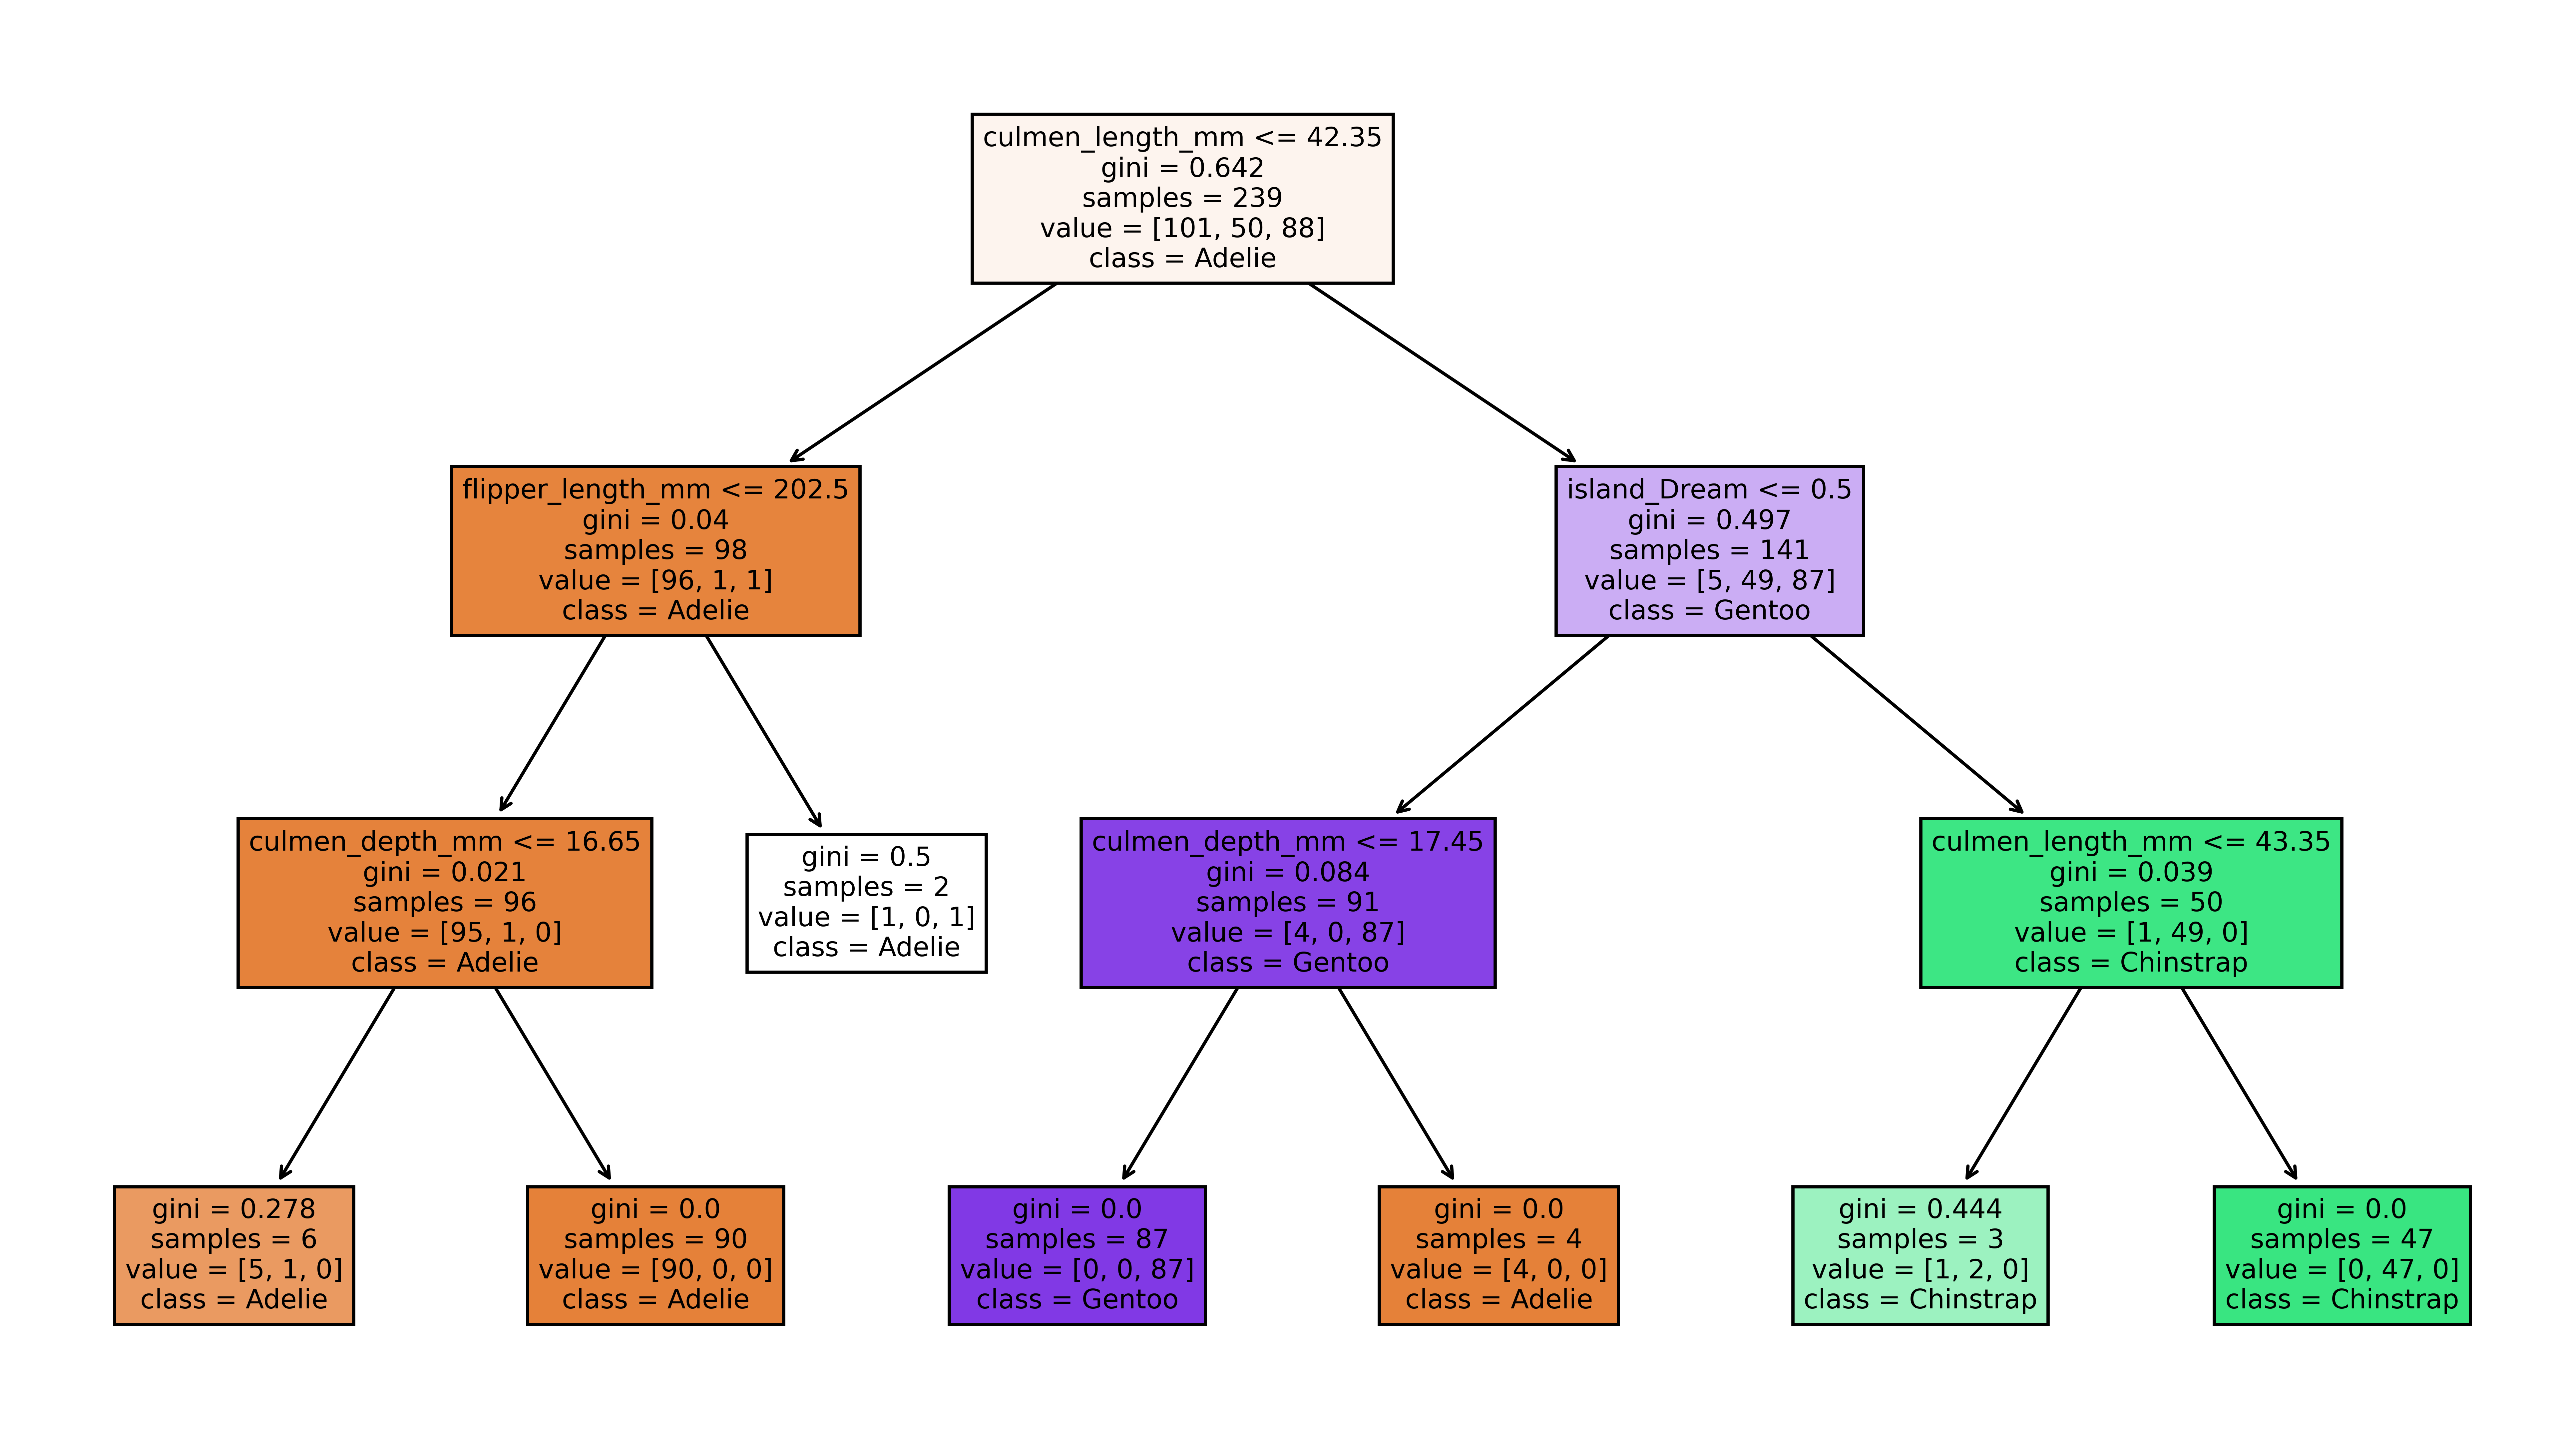

In [141]:
plt.figure(figsize=(14, 8), dpi=700)
plot_tree(tree_model, feature_names=X.columns, filled=True, class_names=tree_model.classes_);
plt.savefig('decision_tree', dpi=700)

### The classification score

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.96      0.98      0.97        50
   Chinstrap       0.95      1.00      0.97        18
      Gentoo       1.00      0.94      0.97        35

    accuracy                           0.97       103
   macro avg       0.97      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103



### The confusion matrix for the results

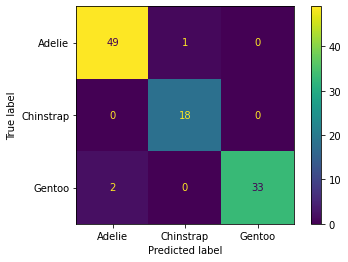

In [142]:
plot_confusion_matrix(tree_model, X_test, y_test)
plt.savefig('confusion_matrix', dpi=700)